# OpenCV - Object Detection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Object Detection by Color Feature

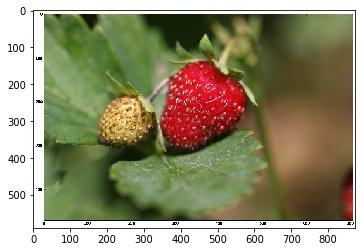

In [2]:
# Read sample image.
color_image = cv2.cvtColor(cv2.imread('../images/strawberry.png'), cv2.COLOR_BGR2RGB)
_ = plt.imshow(color_image)

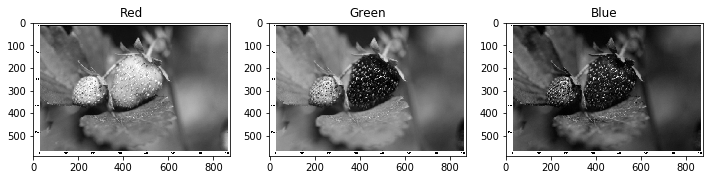

In [3]:
# Seperate channel.
red_channel = color_image[:,:,0]
green_channel = color_image[:,:,1]
blue_channel = color_image[:,:,2]

plt.figure(figsize=(12, 4))
plt.subplot(131).set_title('Red')
plt.imshow(red_channel, cmap='gray')
plt.subplot(132).set_title('Green')
plt.imshow(green_channel, cmap='gray')
plt.subplot(133).set_title('Blue')
_ = plt.imshow(blue_channel, cmap='gray')

232.25 118.0


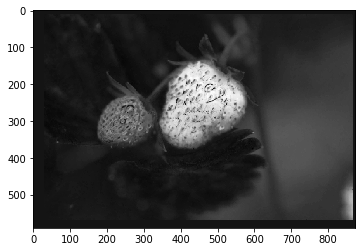

In [4]:
# Enhance red channel. Many approaches can be possible. ie. HSV color space.
fused_channel = red_channel / 2 + 127 - green_channel / 4 - blue_channel / 4
# red -> 255, white & black -> 127, green & blue -> 0
plt.imshow(fused_channel, cmap='gray')
print(np.max(fused_channel), np.min(fused_channel))

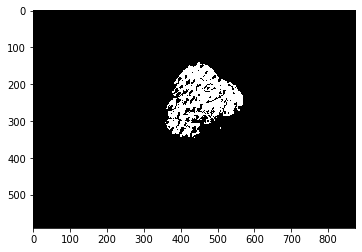

In [5]:
# Binarize.
threshold_value, binarized_image = cv2.threshold(fused_channel, 200, 255, cv2.THRESH_BINARY)
_ = plt.imshow(binarized_image, cmap='gray')

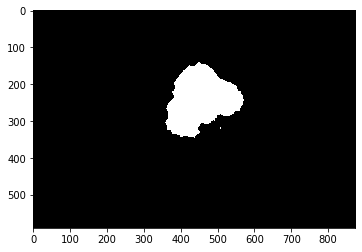

In [6]:
# Fill small gaps by closing operation.
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
closed_image = cv2.morphologyEx(binarized_image, cv2.MORPH_CLOSE, kernel)
_ = plt.imshow(closed_image, cmap='gray')

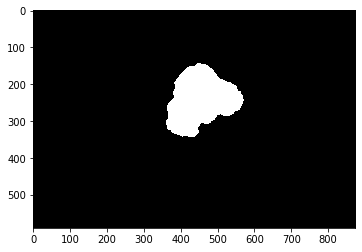

In [7]:
# Remove specks by opening operation.
opened_image = cv2.morphologyEx(closed_image, cv2.MORPH_OPEN, kernel)
_ = plt.imshow(opened_image, cmap='gray')

In [8]:
# Get contours.
# See https://docs.opencv.org/3.1.0/d4/d73/tutorial_py_contours_begin.html for more information.
contour_image = opened_image.astype(np.uint8)
_image, contours, hierarchy = cv2.findContours(contour_image,
                                               cv2.RETR_LIST,
                                               cv2.CHAIN_APPROX_SIMPLE)

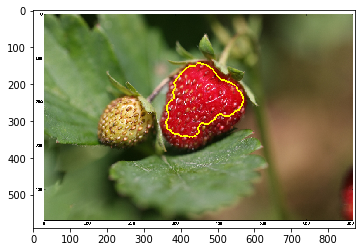

In [9]:
# Display results.
result_image = color_image.copy()
for contour in contours:
    x, y = contour[0][0]
    for [[newx, newy]] in contour:
        cv2.line(result_image, (x, y), (newx, newy), (255, 255, 0), 3)
        x, y = newx, newy
_ = plt.imshow(result_image, cmap='gray')

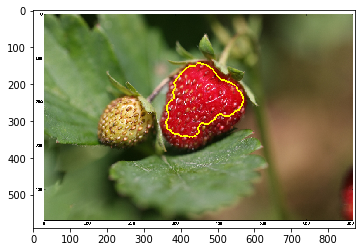

In [10]:
# Display results.
result_image = color_image.copy()
cv2.drawContours(result_image, contours, -1, (255, 255, 0), 3)
_ = plt.imshow(result_image, cmap='gray')

## Haar Feature-based Cascade Classifier for Object Detection

![](haarfeatures.png)

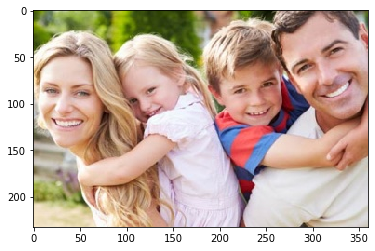

In [11]:
# Read image.
color_image = cv2.cvtColor(cv2.imread('../images/faces.jpg'), cv2.COLOR_BGR2RGB)
_ = plt.imshow(color_image)

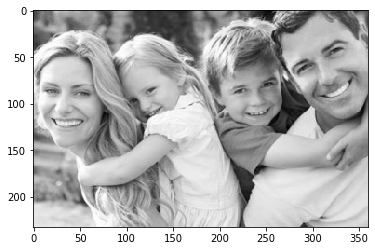

In [12]:
# Convert to gray-scale image.
gray_image = cv2.cvtColor(color_image, cv2.COLOR_RGB2GRAY)
_ = plt.imshow(gray_image, cmap='gray')

In [13]:
# Get cascade classifier.
# pre-trained data from https://github.com/opencv/opencv/tree/master/data/haarcascades
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [14]:
# Detect face.
# See https://docs.opencv.org/2.4/modules/objdetect/doc/cascade_classification.html
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=1)
print('faces =', faces, sep='\n')

faces =
[[202  59  69  69]
 [  1  58  79  79]]


In [15]:
# Detect eye.
result_image = color_image.copy()

for (x, y, w, h) in faces:
    result_image = cv2.rectangle(result_image,
                                 (x, y), (x + w, y + h),
                                 (255, 0, 0), 2)
    roi_gray = gray_image[y:y + h, x:x + w]
    roi_color = result_image[y:y + h, x:x + w]

    eyes = eye_cascade.detectMultiScale(roi_gray)
    
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

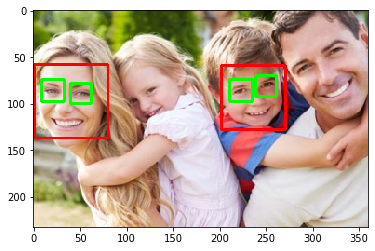

In [16]:
# Display results.
_ = plt.imshow(result_image)

## Object Detection by Template Matching (with Correlation)

(3253, 5088, 3)


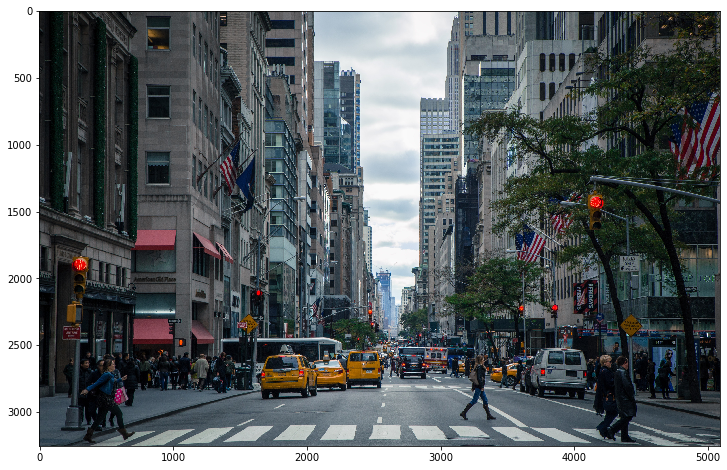

In [17]:
# Read input image.
color_image = cv2.cvtColor(cv2.imread('../images/city_scene.jpg'), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(16, 8))
plt.imshow(color_image)
print(color_image.shape)

100 80


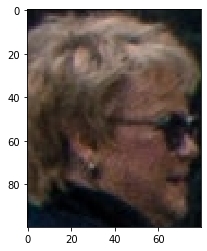

In [18]:
# Get template.
template_image = color_image[2570:2670, 4200:4280, :]
plt.imshow(template_image)
width, height, _ = template_image.shape
print(width, height)

In [19]:
# All the 6 methods for comparison in a list
methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR,
           cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]
names = ['TM_CCOEFF', 'TM_CCOEFF_NORMED', 'TM_CCORR',
         'TM_CCORR_NORMED', 'TM_SQDIFF', 'TM_SQDIFF_NORMED']

Method = TM_CCOEFF
(2116, 2439) ~ (2216, 2519)


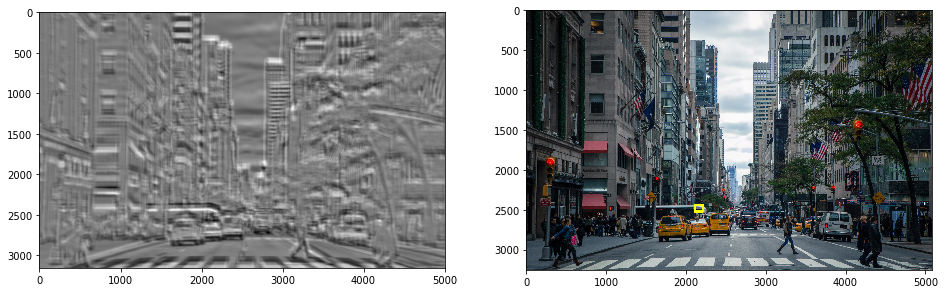

Method = TM_CCOEFF_NORMED
(4200, 2570) ~ (4300, 2650)


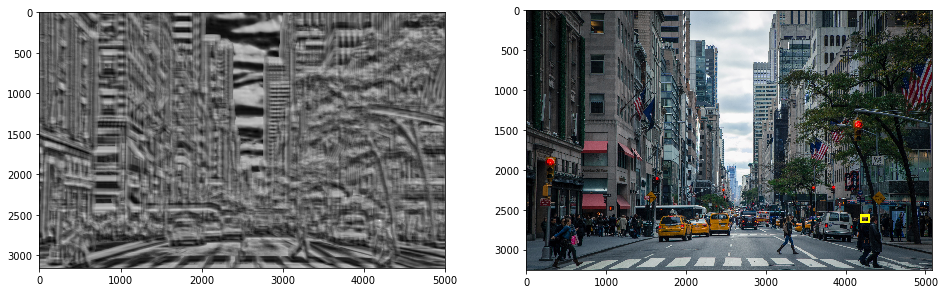

Method = TM_CCORR
(2549, 1302) ~ (2649, 1382)


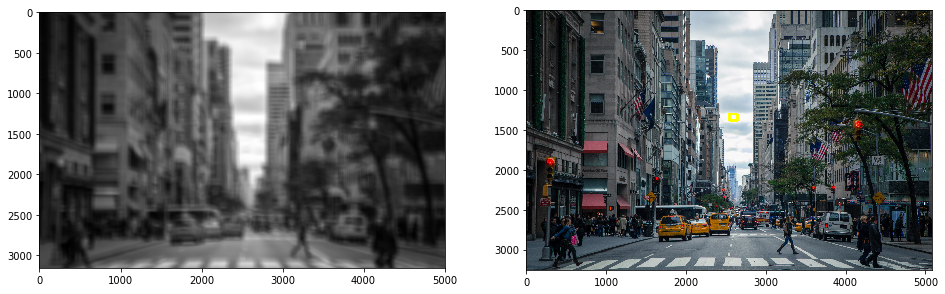

Method = TM_CCORR_NORMED
(4200, 2570) ~ (4300, 2650)


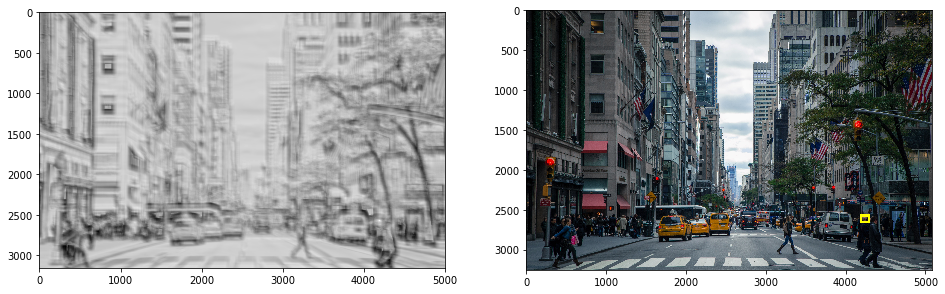

Method = TM_SQDIFF
(4200, 2570) ~ (4300, 2650)


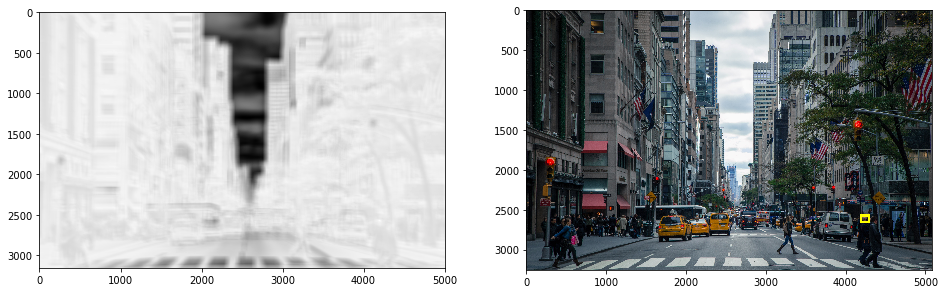

Method = TM_SQDIFF_NORMED
(4200, 2570) ~ (4300, 2650)


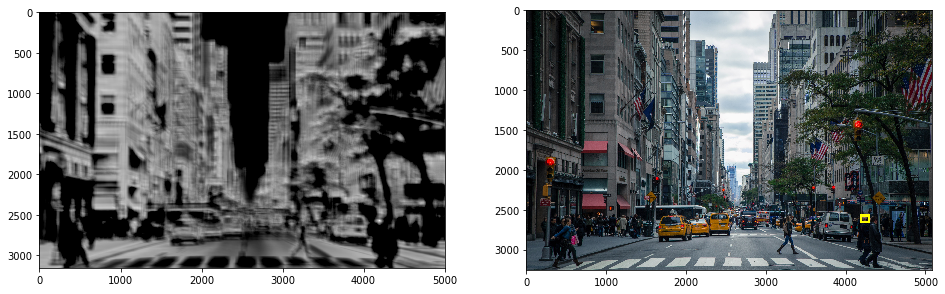

In [20]:
for method, name in zip(methods, names):
    print('Method =', name)

    temp_image = color_image.copy()

    # Apply template Matching
    result = cv2.matchTemplate(temp_image, template_image, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        left_top = min_loc
        result = 255 - result
    else:
        left_top = max_loc

    right_bottom = (left_top[0] + width, left_top[1] + height)

    cv2.rectangle(temp_image, left_top, right_bottom, (255, 255, 0), 30)
    print(left_top, '~', right_bottom)
    
    f = plt.figure(figsize=(16, 8))
    ax = f.add_subplot(121)
    ax.imshow(result, cmap = 'gray')

    ax = f.add_subplot(122)
    ax.imshow(temp_image)

    plt.show()

### Template Matching Modes

![Template Matching Modes](template_matching_modes.png)

- See https://docs.opencv.org/4.0.1/df/dfb/group__imgproc__object.html for more information.

## Reference
- https://github.com/llSourcell/Object_Detection_demo_LIVE
- https://github.com/opencv/opencv/tree/master/data/haarcascades
- https://docs.opencv.org/2.4/modules/objdetect/doc/cascade_classification.html
- https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_template_matching/py_template_matching.html